### Setup 

In [26]:
import pandas as pd
from pandas.io import sql
import sqlite3
import timeit
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib import rcParams

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

! pwd

/Users/nicholasbeaudoin/Desktop/ShotLink Analytics


### DB Query

In [27]:
# Create SQl DB connection
conn = sqlite3.connect('Shotlink.db')

In [28]:
df_1 = sql.read_sql(("""SELECT * FROM PGA_stats 
                WHERE Year = '2018'
                AND
                (PlayerFullName = 'Woods, Tiger' 
                OR PlayerFullName = 'Mickelson, Phil'"""), con=conn)
print(len(df_1))

1173231


In [29]:
# Subset to only those shots on the green
df_2 = df_1[df_1['FromLocation(Scorer)'] == 'Green']
df_2.head()

,Tour Code,TourDescription,Year,Tourn.#,Player#,Course#,PermanentTournament#,PlayerFirstName,PlayerLastName,Round,TournamentName,CourseName,Hole,HoleScore,ParValue,Yardage,Shot,ShotType(S/P/D),#ofStrokes,FromLocation(Scorer),FromLocation(Enhanced),To Location(Scorer),ToLocation(Enhanced),Distance,DistancetoPin,IntheHoleFlag,AroundtheGreenFlag,1stPuttFlag,DistancetoHoleaftertheShot,Time,Lie,Elevation,Slope,X Coordinate,Y Coordinate,Z Coordinate,DistancefromCenter,DistancefromEdge,Date,Left/Right,StrokesGained/Baseline,StrokesGainedCategory,RecoveryShot,PlayerFullName,DistanceYds,DistancetoPinYds,DistancetoHoleaftertheShotYds,DistancefromEdgeYds,DistanceFt,DistancetoPinFt,DistancetoHoleaftertheShotFt,DistancefromEdgeFt,CourseYardage
2,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,1,4.0,04,436,3,S,1,Green,Unmapped,Green,Unmapped,121,117,N,N,Y,13,1254,Good,With,Level,"10,827.3330","9,964.0730",91.0890,00010,361,10/05/2017,L,-0.390,Putting,No,"Mickelson, Phil",3,3,0,10,10.1,9.8,1.1,30.1,7166
3,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,1,4.0,04,436,4,S,1,Green,Unmapped,0,0,13,13,Y,N,N,0,1254,Good,With,Level,.0000,.0000,.0000,00000,0,10/05/2017,0,0.002,Putting,No,"Mickelson, Phil",0,0,0,0,1.1,1.1,0.0,0.0,7166
5,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,2,3.0,03,240,2,S,1,Green,Unmapped,Green,Unmapped,321,326,N,N,Y,7,1304,Good,With,Level,"10,211.4400","10,513.6020",100.3760,00008,445,10/05/2017,R,-0.049,Putting,No,"Mickelson, Phil",8,9,0,12,26.8,27.2,0.6,37.1,7166
6,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,2,3.0,03,240,3,S,1,Green,Unmapped,0,0,7,7,Y,N,N,0,1305,Good,With,Level,.0000,.0000,.0000,00000,0,10/05/2017,0,0.001,Putting,No,"Mickelson, Phil",0,0,0,0,0.6,0.6,0.0,0.0,7166
9,R,PGA TOUR,2018,010,01810,552,464,Phil,Mickelson,1,Safeway Open,Silverado Resort and Spa North,3,4.0,04,424,3,S,1,Green,Unmapped,Green,Unmapped,186,158,N,N,Y,25,1319,Good,With,Level,"9,998.9000","11,487.3020",129.6030,00017,672,10/05/2017,L,-0.276,Putting,No,"Mickelson, Phil",5,4,0,18,15.5,13.2,2.1,56.0,7166


In [30]:
# Drop columns, keep 3
features = ['PlayerFullName', 'IntheHoleFlag', 'DistanceFt', 'DistancetoHoleaftertheShot', 'CourseName']
df_3 = df_2.filter(features)
df_3.reset_index(inplace=True)
df_3.drop(columns='index', inplace=True)
df_3

,PlayerFullName,IntheHoleFlag,DistanceFt,DistancetoHoleaftertheShot,CourseName
0,"Mickelson, Phil",N,10.1,13,Silverado Resort and Spa North
1,"Mickelson, Phil",Y,1.1,0,Silverado Resort and Spa North
2,"Mickelson, Phil",N,26.8,7,Silverado Resort and Spa North
3,"Mickelson, Phil",Y,0.6,0,Silverado Resort and Spa North
4,"Mickelson, Phil",N,15.5,25,Silverado Resort and Spa North
5,"Mickelson, Phil",Y,2.1,0,Silverado Resort and Spa North
6,"Mickelson, Phil",N,29.2,17,Silverado Resort and Spa North
7,"Mickelson, Phil",Y,1.4,0,Silverado Resort and Spa North
8,"Mickelson, Phil",N,27.2,11,Silverado Resort and Spa North
9,"Mickelson, Phil",Y,0.9,0,Silverado Resort and Spa North


In [32]:
# Convert DistancetoHoleaftertheShot

df_3['DistanceLeft'] = round(df_3['DistancetoHoleaftertheShot']/12, 1)
df_3.head()

,PlayerFullName,IntheHoleFlag,DistanceFt,DistancetoHoleaftertheShot,CourseName,DistanceLeft
0,"Mickelson, Phil",N,10.1,13,Silverado Resort and Spa North,1.1
1,"Mickelson, Phil",Y,1.1,0,Silverado Resort and Spa North,0.0
2,"Mickelson, Phil",N,26.8,7,Silverado Resort and Spa North,0.6
3,"Mickelson, Phil",Y,0.6,0,Silverado Resort and Spa North,0.0
4,"Mickelson, Phil",N,15.5,25,Silverado Resort and Spa North,2.1


### Goal

Create average leave from distance for Tiger Woods

In [33]:
df_tiger = df_3[df_3['PlayerFullName'] == 'Woods, Tiger']
df_tiger

,PlayerFullName,IntheHoleFlag,DistanceFt,DistancetoHoleaftertheShot,CourseName,DistanceLeft
97736,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97737,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97738,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97739,"Woods, Tiger",N,0.0,0,Torrey Pines (North),0.0
97740,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97741,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97742,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97743,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97744,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97745,"Woods, Tiger",N,0.0,0,Torrey Pines (North),0.0


In [34]:
# Data is screwy for Torrey Pines (North) in 2018
df_tiger[df_tiger['CourseName'] == 'Torrey Pines (North)'].head()

,PlayerFullName,IntheHoleFlag,DistanceFt,DistancetoHoleaftertheShot,CourseName,DistanceLeft
97736,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97737,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97738,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0
97739,"Woods, Tiger",N,0.0,0,Torrey Pines (North),0.0
97740,"Woods, Tiger",Y,0.0,0,Torrey Pines (North),0.0


In [35]:
# Remove Torrey Pines (North)
df_tiger = df_tiger[df_tiger != 'Torrey Pines (North)']
df_tiger.dropna(axis=0, inplace=True)
df_tiger.reset_index(inplace=True)
df_tiger

,index,PlayerFullName,IntheHoleFlag,DistanceFt,DistancetoHoleaftertheShot,CourseName,DistanceLeft
0,100023,"Woods, Tiger",N,13.0,14,Torrey Pines GC (South),1.2
1,100024,"Woods, Tiger",Y,1.2,0,Torrey Pines GC (South),0.0
2,100025,"Woods, Tiger",Y,4.2,0,Torrey Pines GC (South),0.0
3,100026,"Woods, Tiger",N,28.3,8,Torrey Pines GC (South),0.7
4,100027,"Woods, Tiger",Y,0.7,0,Torrey Pines GC (South),0.0
5,100028,"Woods, Tiger",N,48.3,45,Torrey Pines GC (South),3.8
6,100029,"Woods, Tiger",Y,3.8,0,Torrey Pines GC (South),0.0
7,100030,"Woods, Tiger",N,15.5,43,Torrey Pines GC (South),3.6
8,100031,"Woods, Tiger",Y,3.6,0,Torrey Pines GC (South),0.0
9,100032,"Woods, Tiger",N,51.9,3,Torrey Pines GC (South),0.2


In [36]:
start_distance_list = []
finish_distance_list = []

for i in df_tiger['DistanceFt']:
    start_distance_list.append(i)

for j in df_tiger['DistanceLeft']:
    finish_distance_list.append(j)
    
final_df = pd.DataFrame(list(zip(start_distance_list, finish_distance_list)),
                            columns=['start_distance', 'finish_distance'])

final_df

,start_distance,finish_distance
0,13.0,1.2
1,1.2,0.0
2,4.2,0.0
3,28.3,0.7
4,0.7,0.0
5,48.3,3.8
6,3.8,0.0
7,15.5,3.6
8,3.6,0.0
9,51.9,0.2


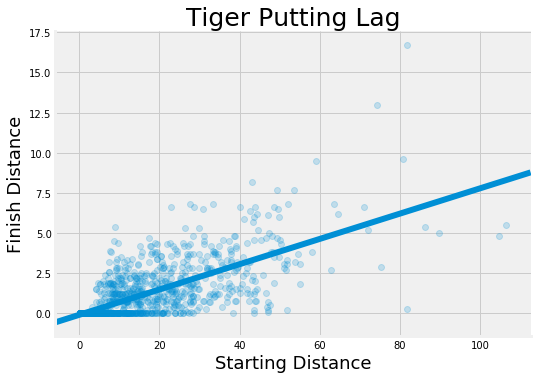

In [37]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# Seaborn scatter plot with regression line
sns.lmplot(x='start_distance', y='finish_distance', data=final_df, ci=None, order=1, aspect=1.5, scatter_kws={'alpha':0.2})

plt.title('Tiger Putting Lag', fontsize=25)  
plt.xlabel('Starting Distance', fontsize=18)  
plt.ylabel('Finish Distance', fontsize=18)  
plt.show()  

# Creating a model to predict putt lag

In [182]:
# Define X and y
X = final_df.iloc[:, :-1].values  
y = final_df.iloc[:, 1].values  

In [191]:
# Confirm shape
print(X.shape)
print(y.shape)

(1511, 1)
(1511,)


In [192]:
# Test/train split form sklearn
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [193]:
# Import linear regression model 
from sklearn.linear_model import LinearRegression  

# Instantiate model
regressor = LinearRegression()  

# Fit model
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [186]:
# Intercept
print(regressor.intercept_)  

-0.04300263339680033


In [194]:
# Coefficient
print(regressor.coef_)

[0.07558906]


## Making Predictions

In [188]:
# Predict
y_pred = regressor.predict(X_test)  

In [195]:
# Create prediction DF
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
new_df 

,Actual,Predicted
0,0.0,0.584387
1,0.2,0.387855
2,0.0,0.198882
3,0.0,0.070381
4,0.2,3.880069
5,1.8,0.750682
6,0.8,0.894302
7,0.0,0.047704
8,0.0,0.070381
9,1.2,3.169532


In [196]:
# Evaluation
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6186987754104052
Mean Squared Error: 1.267346502798108
Root Mean Squared Error: 1.1257648523551034


In [212]:
### Second model
# Quadratic term for starting_distance
final_df['finish_distance_2'] = final_df['finish_distance'] * final_df['finish_distance']

# Define X and y
X = final_df.iloc[:, :-1].values  
y = final_df.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# Instantiate model
regressor = LinearRegression()  

# Fit model
regressor.fit(X_train, y_train) 

# Predict
y_pred = regressor.predict(X_test)  

# Evaluation
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.936781201619714e-16
Mean Squared Error: 7.874218718692086e-31
Root Mean Squared Error: 8.873679461583051e-16


In [213]:
### Third model
# Cubed term for starting_distance
final_df['finish_distance_3'] = final_df['finish_distance'] * final_df['finish_distance'] * final_df['finish_distance']

# Define X and y
X = final_df.iloc[:, :-1].values  
y = final_df.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# Instantiate model
regressor = LinearRegression()  

# Fit model
regressor.fit(X_train, y_train) 

# Predict
y_pred = regressor.predict(X_test)  

# Evaluation
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0612614564187089e-15
Mean Squared Error: 2.5359634871185653e-30
Root Mean Squared Error: 1.5924708748101376e-15


## Best Model

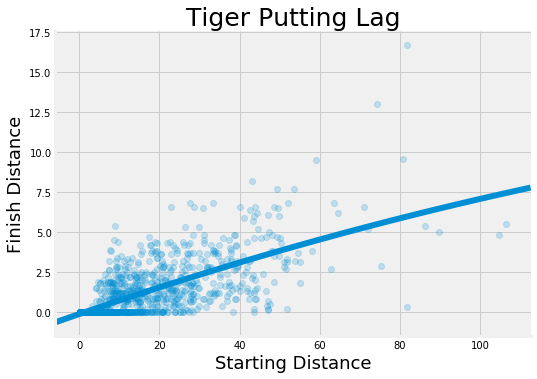

In [218]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Seaborn scatter plot with regression line
sns.lmplot(x='start_distance', y='finish_distance', ci=None, order=2, data=final_df, aspect=1.5, scatter_kws={'alpha':0.2})

plt.title('Tiger Putting Lag', fontsize=25)  
plt.xlabel('Starting Distance', fontsize=18)  
plt.ylabel('Finish Distance', fontsize=18)  
plt.show()  